In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import image as im
from tensorflow import image as tfimage
from matplotlib import pyplot as plt
from imutils import paths
import numpy as np
import argparse
import cv2
import os

In [ ]:
#!tar -xvzf train.zip
!jar xvf train.zip

Streaming output truncated to the last 5000 lines.
 inflated: train/dog.2728.jpg
 inflated: train/dog.2729.jpg
 inflated: train/dog.273.jpg
 inflated: train/dog.2730.jpg
 inflated: train/dog.2731.jpg
 inflated: train/dog.2732.jpg
 inflated: train/dog.2733.jpg
 inflated: train/dog.2734.jpg
 inflated: train/dog.2735.jpg
 inflated: train/dog.2736.jpg
 inflated: train/dog.2737.jpg
 inflated: train/dog.2738.jpg
 inflated: train/dog.2739.jpg
 inflated: train/dog.274.jpg
 inflated: train/dog.2740.jpg
 inflated: train/dog.2741.jpg
 inflated: train/dog.2742.jpg
 inflated: train/dog.2743.jpg
 inflated: train/dog.2744.jpg
 inflated: train/dog.2745.jpg
 inflated: train/dog.2746.jpg
 inflated: train/dog.2747.jpg
 inflated: train/dog.2748.jpg
 inflated: train/dog.2749.jpg
 inflated: train/dog.275.jpg
 inflated: train/dog.2750.jpg
 inflated: train/dog.2751.jpg
 inflated: train/dog.2752.jpg
 inflated: train/dog.2753.jpg
 inflated: train/dog.2754.jpg
 inflated: train/dog.2755.jpg
 inflated: train/dog.2

In [ ]:
count=0
imagedata=[]
label=[]
dirname="train/"
for i in os.listdir(dirname):
		p=os.path.join(dirname,i)
		count+=1
		image=cv2.imread(p)
		image=cv2.resize(image,(32,32)).flatten()
		imagedata.append(image/255.0)##Normalizing
		imagetype=i.split(".")[0]
		label.append(imagetype)
imagedata=np.array(imagedata)

In [ ]:
print(imagedata.shape)
print(labels.shape)

(21914, 3072)
(21914, 2)


In [ ]:
le=LabelEncoder()
labels=le.fit_transform(label)
labels=to_categorical(labels,2)

In [ ]:
model=Sequential()
model.add(Dense(768,input_shape=(3072,),activation='relu'))
model.add(Dense(384,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

In [ ]:
model.compile(optimizer=SGD(),loss='binary_crossentropy',metrics=["accuracy"])

In [ ]:
model.fit(imagedata,labels,epochs=50,batch_size=32)

Epoch 1/50
685/685 [==============================] - 9s 12ms/step - loss: 0.6685 - accuracy: 0.5882
Epoch 2/50
685/685 [==============================] - 8s 12ms/step - loss: 0.6471 - accuracy: 0.6188
Epoch 3/50
685/685 [==============================] - 8s 12ms/step - loss: 0.6353 - accuracy: 0.6366
Epoch 4/50
685/685 [==============================] - 9s 12ms/step - loss: 0.6262 - accuracy: 0.6462
Epoch 5/50
685/685 [==============================] - 8s 12ms/step - loss: 0.6190 - accuracy: 0.6554
Epoch 6/50
685/685 [==============================] - 9s 13ms/step - loss: 0.6116 - accuracy: 0.6647
Epoch 7/50
685/685 [==============================] - 8s 12ms/step - loss: 0.6044 - accuracy: 0.6683
Epoch 8/50
685/685 [==============================] - 8s 12ms/step - loss: 0.5972 - accuracy: 0.6770
Epoch 9/50
685/685 [==============================] - 9s 12ms/step - loss: 0.5926 - accuracy: 0.6827
Epoch 10/50
685/685 [==============================] - 9s 12ms/step - loss: 0.5850 - accura

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


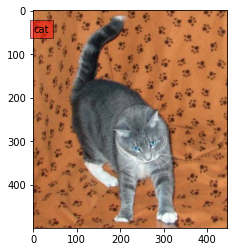

cat  ---  5323.jpg ---------


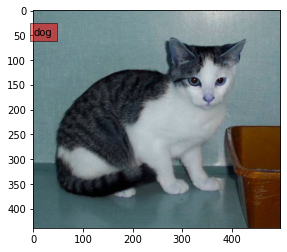

dog  ---  3199.jpg ---------


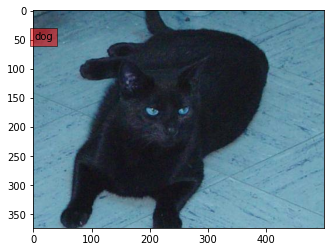

dog  ---  7212.jpg ---------


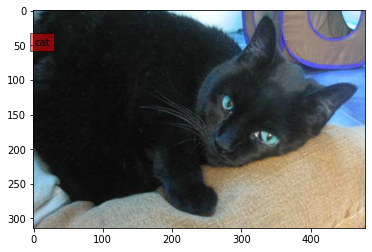

cat  ---  11903.jpg ---------


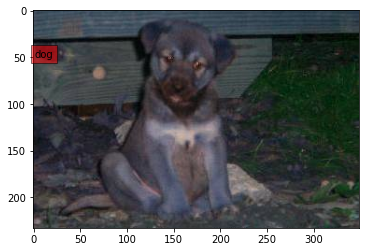

dog  ---  5829.jpg ---------


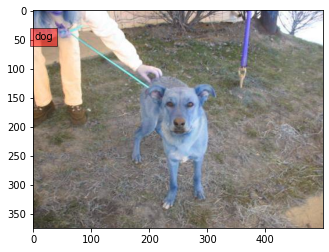

dog  ---  12278.jpg ---------


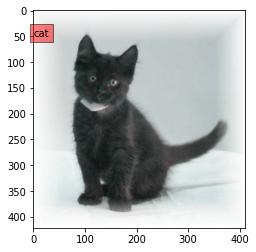

cat  ---  2454.jpg ---------


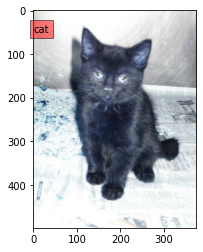

cat  ---  8421.jpg ---------


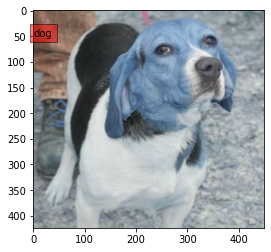

dog  ---  7256.jpg ---------


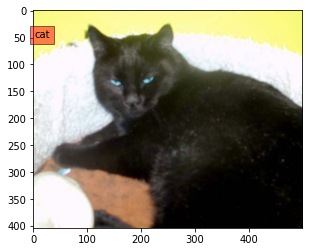

cat  ---  3483.jpg ---------


In [ ]:
count=0
labels={0:'cat',1:'dog'}
for i in os.listdir("test1"):
  if (count != 10):
    p=os.path.join("test1",i)
    count+=1
    image1=cv2.imread(p)
    image=cv2.resize(image1,(32,32)).flatten()
    result=model.predict_classes(np.array([image/255.0]))
    plt.text(1,50,labels[result[0]],bbox=dict(facecolor='red', alpha=0.5))
    plt.imshow(image1)
    plt.show()
    print(labels[result[0]]," --- ",i,"---------")
  else:
    break